# Boxplot of antiSMASH Regions per Genus

Importing packages:

In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import colorcet as cc
from matplotlib.ticker import MaxNLocator

Loading genus_bgccount table as dataframe:

In [2]:
regions_df = pd.read_csv("../../data/bgcflow_output/genus_bgccount.csv", names=['genome_id','genus','regions'])
regions_df['genus'] = regions_df['genus'].str.replace('g__','')

Combining the GTDB-Tk genera Bacillus and Bacillus_A, Paenibacillus and Paenibacillus_A, and Fictibacillus and Fictibacillus_C:

In [3]:
regions_df["genus"] = regions_df["genus"].replace("Bacillus_A", "Bacillus")
regions_df["genus"] = regions_df["genus"].replace("Paenibacillus_A", "Paenibacillus")
regions_df["genus"] = regions_df["genus"].replace("Fictibacillus_C", "Fictibacillus")

Listing the desired order of the genera for the figure:

In [4]:
order_list = ['Peribacillus','Cytobacillus','Mesobacillus','Neobacillus','Ferdinandcohnia', 'Priestia','Siminovitchia','Rossellomorea','Ureibacillus','Lysinibacillus','Halobacillus','Virgibacillus','Fictibacillus','Brevibacillus','Paenibacillus','Bacillus']

Plotting figure:

/tmp/ipykernel_49580/1650978618.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=regions_df, y='genus', x='regions', order=order_list, palette=custom_palette,


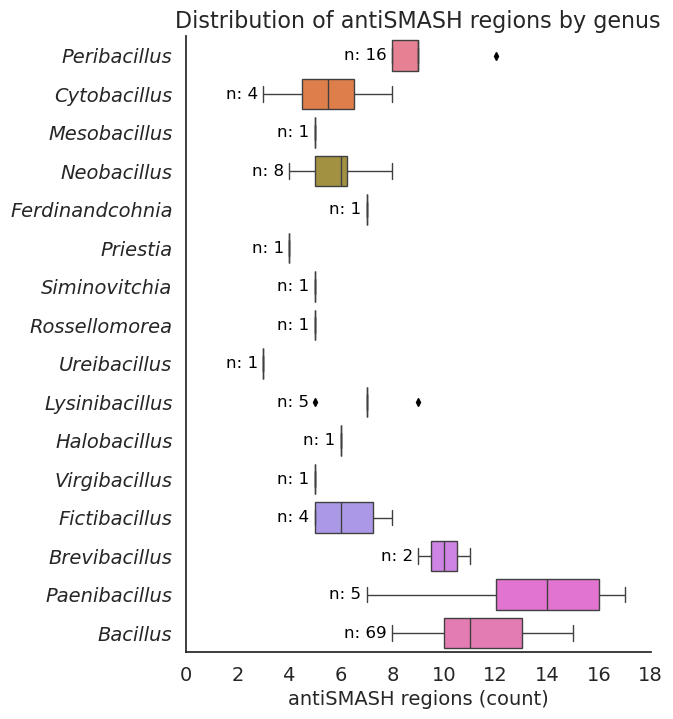

In [8]:
# Choosing box color pallete and figure theme
custom_palette = sns.color_palette("husl", len(order_list))
sns.set_theme(style="white")

# Setting figure size
fig, ax = plt.subplots(figsize=(6,8))

# Making boxplot of dataframe with seaborn sns
sns.boxplot(data=regions_df, y='genus', x='regions', order=order_list, palette=custom_palette,
            flierprops={'marker':'d', 'markersize':4, 'markerfacecolor':'black', 'markeredgecolor':'black'})

# Adding number of observations per genera to each box
medians = regions_df.groupby(['genus'])['regions'].min().reindex(order_list).values
nobs = regions_df['genus'].value_counts().reindex(order_list).values
nobs = [str(x) for x in nobs.tolist()]
nobs = ["n: " + i + " " for i in nobs] 
pos = range(len(nobs))

for tick, label in zip(pos, ax.get_yticklabels()):
    ax.text(medians[tick], tick, nobs[tick], color='black', verticalalignment="center", horizontalalignment='right')
sns.despine()

# Setting and formatting figure text and axis
ax.set_title("Distribution of antiSMASH regions by genus", size=16)
ax.set_xlabel("antiSMASH regions (count)", size=14)
ax.set_ylabel("")
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
ax.set_xlim(0, 18)
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.yaxis.set_label_coords(-0.1,1.02)

# Making genus names itallic
for label in ax.get_yticklabels():
    label.set_fontstyle('italic')

# Saving figure
fig.savefig("../../results/figures/regions.png", bbox_inches="tight")